<a href="https://colab.research.google.com/github/AndrewPiasecki/CrimeDataSince2020/blob/main/Analysis-mandacontribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports, Data Info, and Data Cleaning


In [1]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://github.com/AndrewPiasecki/CrimeDataSince2020/blob/main/CrimeData.csv?raw=true"

In [3]:
Crime = pd.read_csv(url, index_col=0)

In [4]:
Crime.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
DR_NO,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990293 entries, 190326475 to 240910892
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       990293 non-null  object 
 1   DATE OCC        990293 non-null  object 
 2   TIME OCC        990293 non-null  int64  
 3   AREA            990293 non-null  int64  
 4   AREA NAME       990293 non-null  object 
 5   Rpt Dist No     990293 non-null  int64  
 6   Part 1-2        990293 non-null  int64  
 7   Crm Cd          990293 non-null  int64  
 8   Crm Cd Desc     990293 non-null  object 
 9   Mocodes         842641 non-null  object 
 10  Vict Age        990293 non-null  int64  
 11  Vict Sex        849515 non-null  object 
 12  Vict Descent    849504 non-null  object 
 13  Premis Cd       989970 non-null  float64
 14  Premis Desc     989399 non-null  object 
 15  Weapon Used Cd  326547 non-null  float64
 16  Weapon Desc     326547 non-null  object 
 17  Stat

In [6]:
Crime.isnull().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Mocodes,147652


In [7]:
Crime.shape

(990293, 27)

In [8]:
Crime.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,990293.000000,990293.000000,990293.000000,990293.000000,990293.000000,990293.000000,989970.000000,326547.000000,990282.000000,68957.000000,2311.000000,64.00000,990293.000000,990293.000000
mean,1339.256672,10.697314,1116.172073,1.402950,500.675146,29.011584,305.964166,363.873623,500.431720,958.159752,984.204673,991.21875,33.986463,-118.050015
std,651.351436,6.108960,611.015402,0.490491,205.914118,21.982132,219.200779,123.703129,205.713105,110.251655,51.485644,27.06985,1.730076,5.997837
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430400
50%,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [9]:
# Replacing blank values with NA (I parsed through and saw these as the main culprits)

Crime["Status"].fillna("NA", inplace=True)
Crime["Mocodes"].fillna("NA", inplace=True)
Crime["Vict Sex"].fillna("NA", inplace=True)
Crime["Premis Desc"].fillna("NA", inplace=True)
Crime["Premis Cd"].fillna("NA", inplace=True)
Crime["Weapon Used Cd"].fillna("NA", inplace=True)
Crime["Weapon Desc"].fillna("NA", inplace=True)
Crime["Crm Cd 1"].fillna("NA", inplace=True)
Crime["Crm Cd 4"].fillna("NA", inplace=True)
Crime["Crm Cd 3"].fillna("NA", inplace=True)
Crime["Crm Cd 2"].fillna("NA", inplace=True)
Crime["Cross Street"].fillna("NA", inplace=True)
Crime["Vict Descent"].fillna("NA", inplace=True)




<ipython-input-9-04bb5d741786>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Crime["Status"].fillna("NA", inplace=True)
<ipython-input-9-04bb5d741786>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [10]:
# Converting all dates the datetime

Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)

<ipython-input-10-00f5db8d78b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)
<ipython-input-10-00f5db8d78b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)


,DATE OCC,Date Rptd
DR_NO,,
190326475,2020-03-01,2020-03-01
200106753,2020-02-08,2020-02-09
200320258,2020-11-04,2020-11-11
200907217,2020-03-10,2023-05-10
220614831,2020-08-17,2022-08-18
...,...,...
240710284,2024-07-23,2024-07-24
240104953,2024-01-15,2024-01-15
240410786,2024-10-11,2024-10-14


In [11]:
Crime.isnull().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Mocodes,0


# Visualizations and Discovery

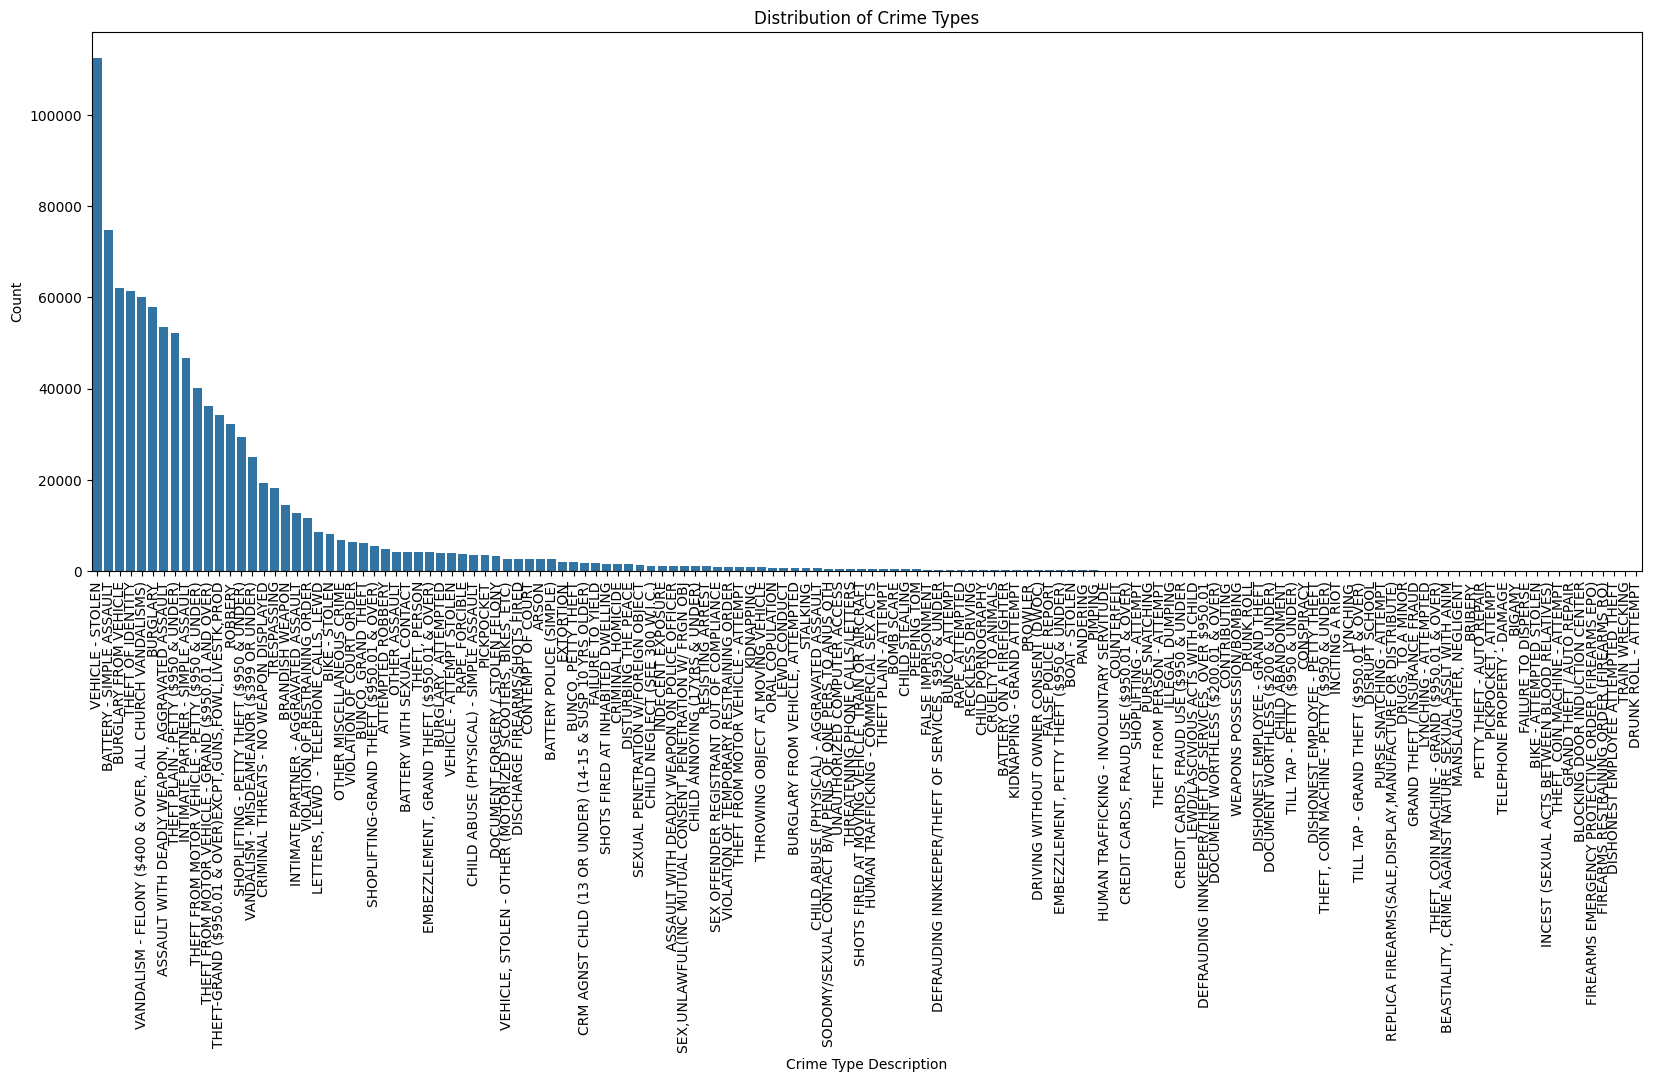

In [12]:
plt.figure(figsize=(20, 7))
sns.countplot(data = Crime, x = "Crm Cd Desc", order = Crime["Crm Cd Desc"].value_counts().index)
plt.xlabel("Crime Type Description")
plt.ylabel("Count")
plt.title("Distribution of Crime Types")
plt.xticks(rotation=90)
plt.show()

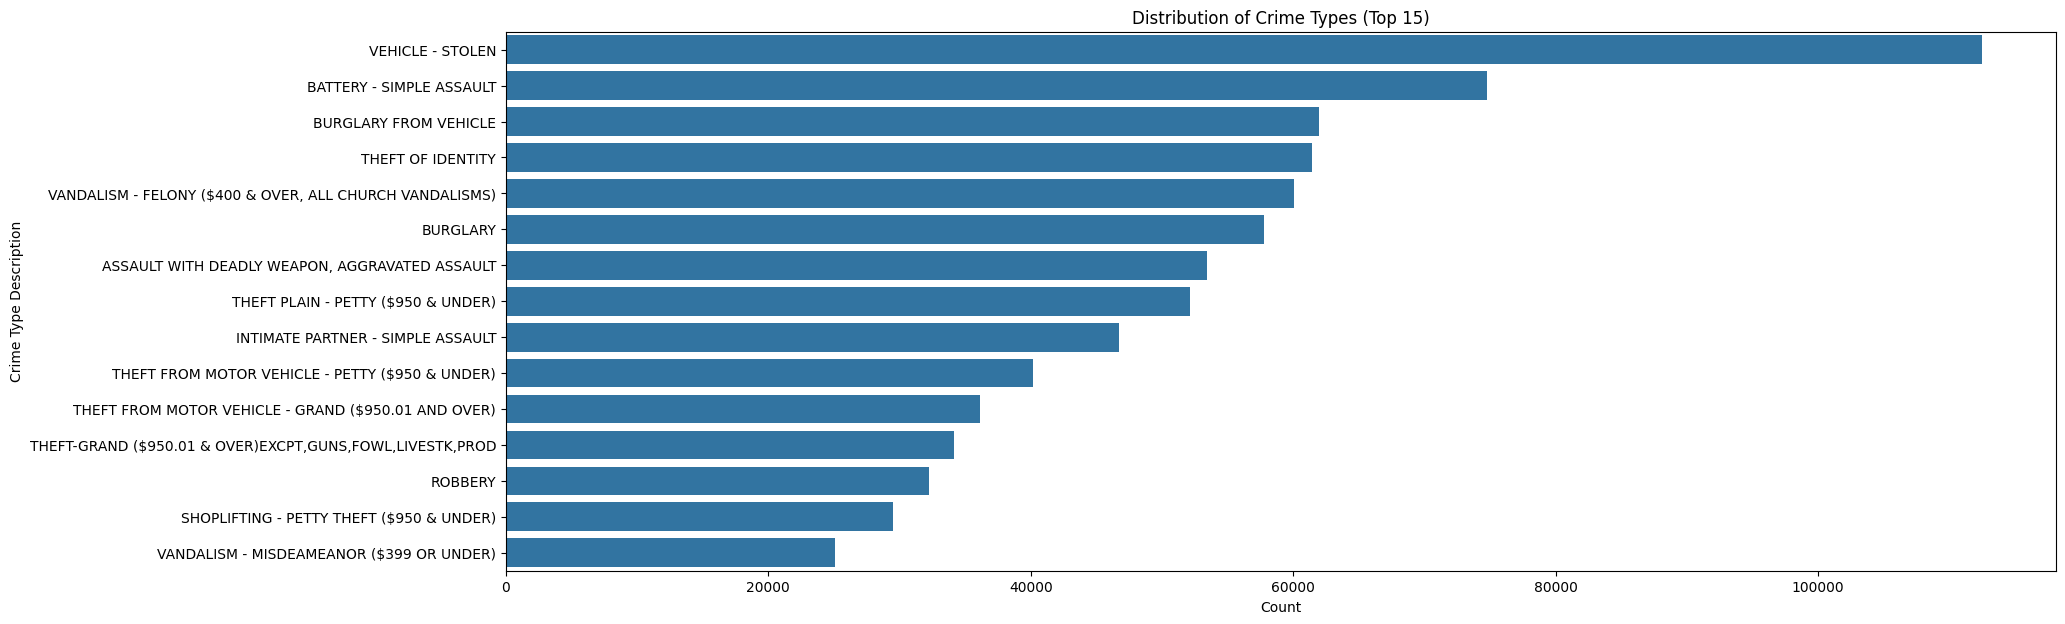

In [13]:
plt.figure(figsize=(20, 7))
sns.countplot(data=Crime, y='Crm Cd Desc', order=Crime['Crm Cd Desc'].value_counts().head(15).index)
plt.ylabel("Crime Type Description")
plt.xlabel("Count")
plt.title("Distribution of Crime Types (Top 15)")
plt.show()

<Figure size 1500x1000 with 0 Axes>

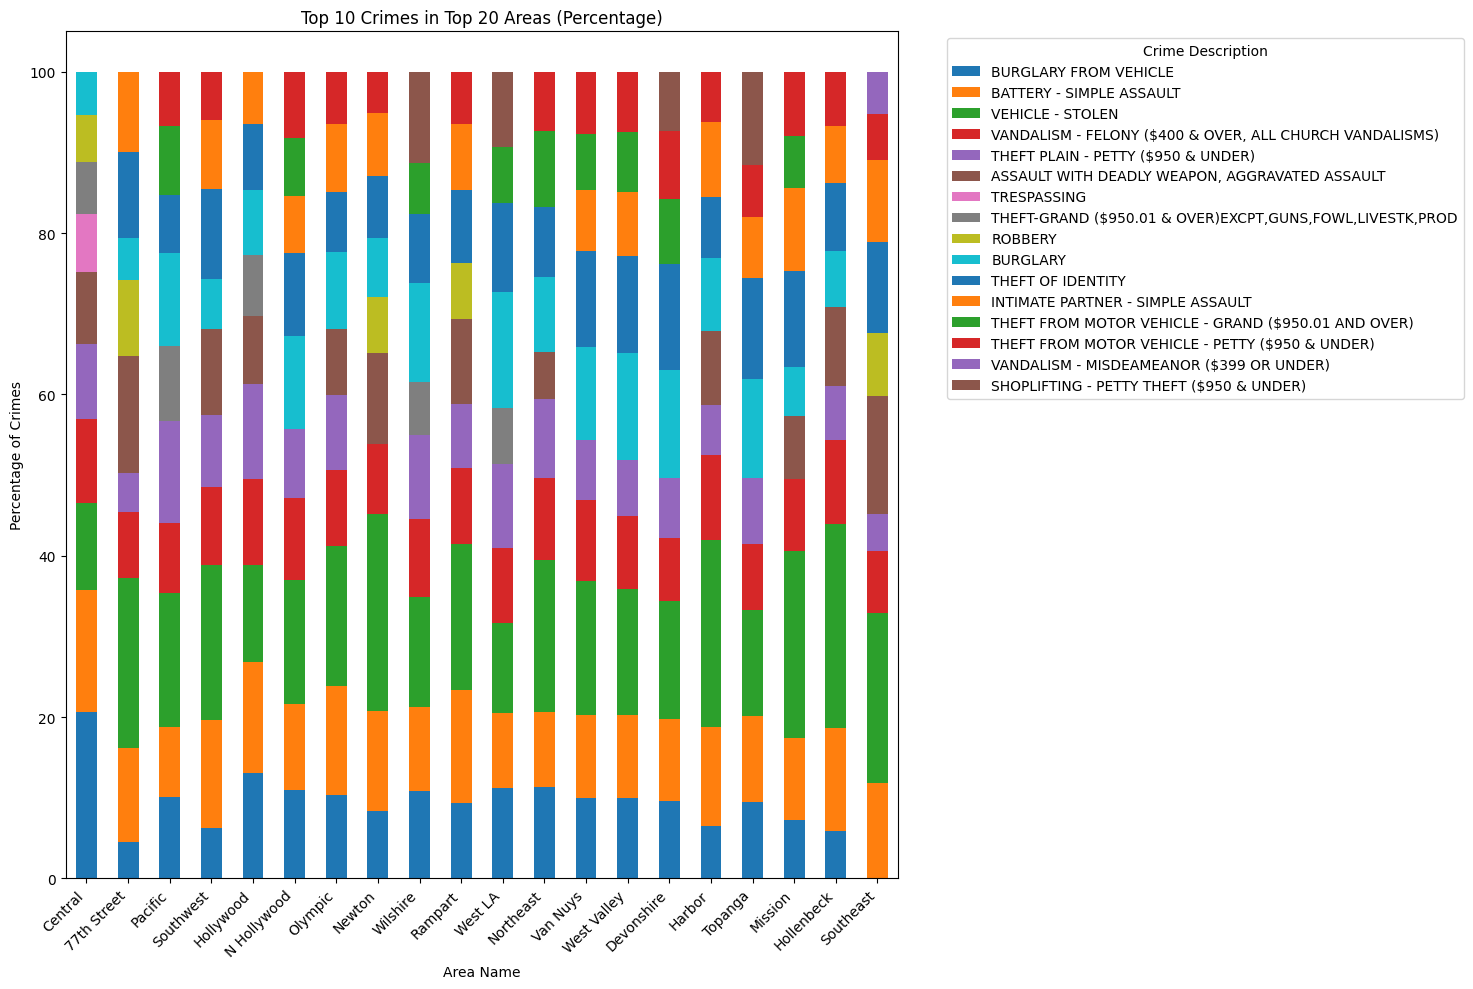

In [14]:

top_20_areas = Crime['AREA NAME'].value_counts().nlargest(20).index

# Create an empty dictionary
top_crimes_by_area = {}

# Iterate
for area in top_20_areas:

    area_crimes = Crime[Crime['AREA NAME'] == area]

    top_10_crimes = area_crimes['Crm Cd Desc'].value_counts().nlargest(10)

    top_crimes_by_area[area] = top_10_crimes


top_crimes_df = pd.DataFrame.from_dict(top_crimes_by_area, orient='index').fillna(0)

# Calculate the percentage
top_crimes_percentage_df = top_crimes_df.div(top_crimes_df.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(15, 10))
top_crimes_percentage_df.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Top 10 Crimes in Top 20 Areas (Percentage)')
plt.xlabel('Area Name')
plt.ylabel('Percentage of Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 20 Most Crime Filled Areas

In [15]:
top_20_areas_df = Crime['AREA NAME'].value_counts().nlargest(20).reset_index()
top_20_areas_df.columns = ['Area Name', 'Crime Count']
top_20_areas_df

,Area Name,Crime Count
0,Central,68421
1,77th Street,61153
2,Pacific,58378
3,Southwest,56491
4,Hollywood,51726
5,N Hollywood,50370
6,Olympic,49416
7,Southeast,49414
8,Newton,48558
9,Wilshire,47472


## Count of each Crime that Happened in the 20 most crime filled area

In [16]:
top_20_crime_counts = {}
for area in top_20_areas:
  area_data = Crime[Crime['AREA NAME'] == area]
  crime_counts = area_data['Crm Cd Desc'].value_counts()
  top_20_crime_counts[area] = crime_counts


top_crimes_df = pd.DataFrame.from_dict(top_20_crime_counts, orient='index')
print("\nCrime Counts for Top 20 Areas:")
top_crimes_df


Crime Counts for Top 20 Areas:


,BURGLARY FROM VEHICLE,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",THEFT PLAIN - PETTY ($950 & UNDER),"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",TRESPASSING,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",ROBBERY,BURGLARY,...,TILL TAP - GRAND THEFT ($950.01 & OVER),TELEPHONE PROPERTY - DAMAGE,BRIBERY,BLOCKING DOOR INDUCTION CENTER,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",FIREARMS RESTRAINING ORDER (FIREARMS RO),PETTY THEFT - AUTO REPAIR,DISHONEST EMPLOYEE ATTEMPTED THEFT,DRUNK ROLL - ATTEMPT,TRAIN WRECKING
Central,9343,6800,4887,4714,4209,4044,3227,2926,2661,2401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77th Street,1855,4706,8596,3337,1956,5912,265,1125,3804,2167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,3880,3313,6400,3342,4858,2019,1103,3571,1094,4423,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Southwest,2124,4520,6503,3246,3012,3626,1066,1547,2013,2109,...,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Hollywood,4239,4481,3918,3468,3821,2738,1369,2446,2038,2615,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
N Hollywood,3529,3432,4948,3277,2739,1971,1502,1987,1130,3719,...,NaN,NaN,NaN,NaN,2.0,1.0,3.0,1.0,NaN,NaN
Olympic,3356,4380,5594,3071,2992,2673,1001,1553,1838,3096,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Southeast,1463,3937,7069,2557,1539,4866,430,949,2628,1375,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN
Newton,2773,4156,8109,2917,1654,3760,439,1565,2278,2447,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wilshire,3283,3162,4107,2935,3152,1682,856,1986,1520,3704,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


Principal Component Summary

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Crime[["DATE OCC", "Date Rptd"]] = Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)

numerical_features = Crime.select_dtypes(include=np.number).columns
numerical_data = Crime[numerical_features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_data)

pc = PCA()
pc.fit(scaled_features)

pc_sum = pd.DataFrame({
    'Standard deviation': np.sqrt(pc.explained_variance_),
    'Proportion of varience': pc.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pc.explained_variance_ratio_)

})

pcSummary = pc_sum.transpose()
pcSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcSummary.columns) + 1)]

pcSummary.round(4)

<ipython-input-17-f775c1bd04fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]] = Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)
<ipython-input-17-f775c1bd04fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]] = Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Standard deviation,1.4276,1.4049,1.3087,1.0214,0.9831,0.5132,0.0386,0.0306
Proportion of varience,0.2548,0.2467,0.2141,0.1304,0.1208,0.0329,0.0002,0.0001
Cumulative proportion,0.2548,0.5015,0.7156,0.8460,0.9668,0.9997,0.9999,1.0000


In [18]:
pcComponents = pd.DataFrame(pc.components_.transpose(),
    columns=pcSummary.columns,
    index=numerical_features)

pcComponents.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
TIME OCC,0.0073,-0.0086,-0.0527,-0.6596,0.7477,0.0543,-0.0002,0.0001
AREA,0.4586,0.5367,-0.0327,-0.0171,-0.0156,-0.0024,0.1082,0.6988
Rpt Dist No,0.4585,0.5368,-0.0328,-0.0171,-0.0155,-0.0026,-0.1178,-0.6972
Part 1-2,-0.0858,0.1197,0.6944,0.0138,0.0123,0.7042,-0.0001,-0.0001
Crm Cd,-0.1001,0.1106,0.6612,-0.2590,-0.1306,-0.6756,-0.0001,0.0000
Vict Age,0.0070,0.0455,0.1820,0.7049,0.6505,-0.2115,-0.0006,0.0002
LAT,0.5332,-0.4407,0.1460,-0.0085,-0.0071,-0.0037,0.6981,-0.1131
LON,-0.5270,0.4482,-0.1462,0.0087,0.0077,0.0035,0.6979,-0.1129


Principal Component Analysis

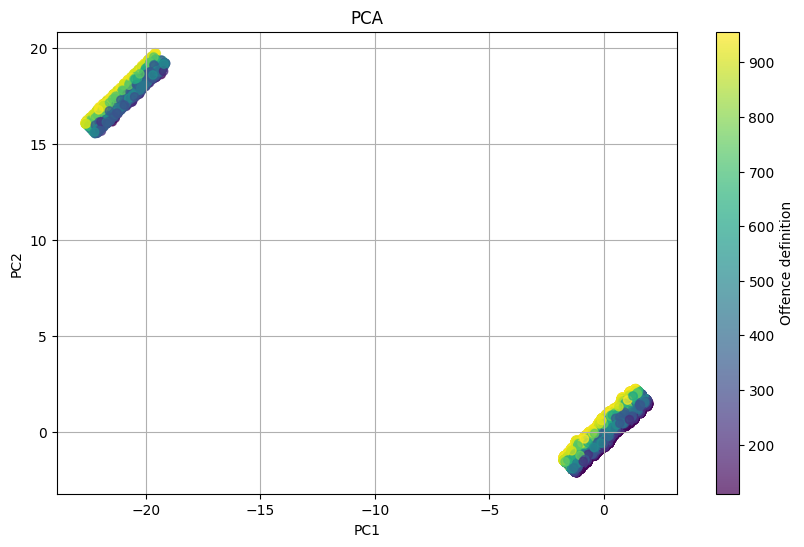

In [19]:
target = Crime['Crm Cd']

pca = PCA(n_components=2)
pca_res = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
plt.scatter(pca_res[:,0], pca_res[:,1], c=target, cmap='viridis', alpha=0.7)

plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(label='Offence definition')

plt.grid(True)
plt.show()

T-Distributed Stochastic Neighbor Embedding (tSNE)

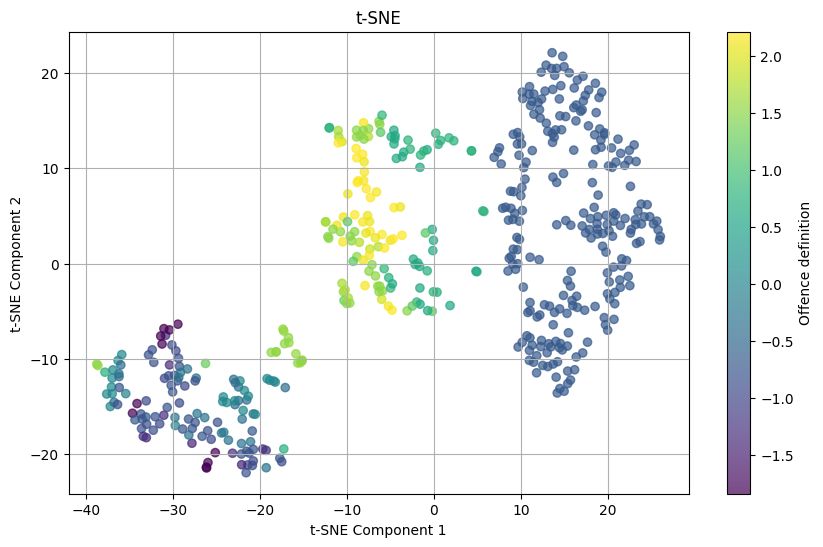

In [20]:
from sklearn.manifold import TSNE

scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)
scaled_features_df = scaled_features_df[0:500]

target = scaled_features_df['Crm Cd']

tsne = TSNE(n_components=2, random_state=42)
tsne_res = tsne.fit_transform(scaled_features_df)

plt.figure(figsize=(10,6))

plt.scatter(tsne_res[:,0], tsne_res[:,1], c=target, cmap='viridis', alpha=0.7)

plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.colorbar(label='Offence definition')
plt.grid(True)
plt.show()

Density-Based Spatial Clustering of Applications (DBSCAN)

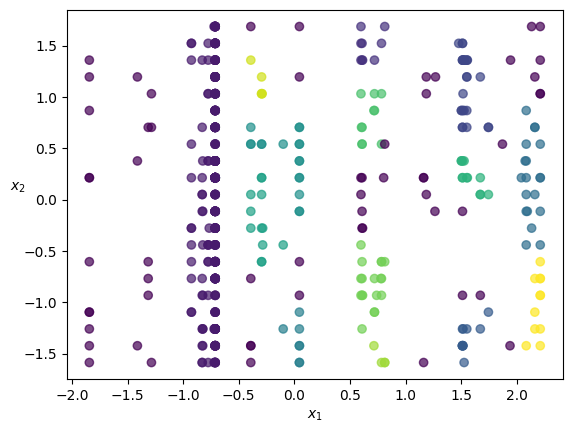

In [21]:
from sklearn.cluster import DBSCAN

scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)
scaled_features_df = scaled_features_df[0:500]
X = scaled_features_df[['Crm Cd', 'AREA']]

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plt.scatter(X['Crm Cd'], X['AREA'], c=dbscan.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

K-Means Clustering

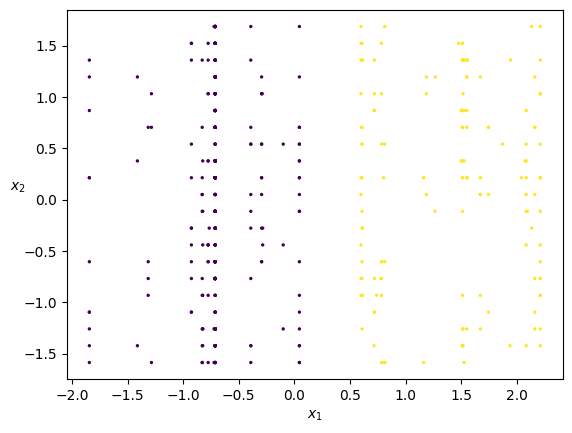

In [22]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=2, random_state=42)
k.fit(X)

plt.scatter(X['Crm Cd'], X['AREA'], c=k.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

Davies Boulding Score (DBI)

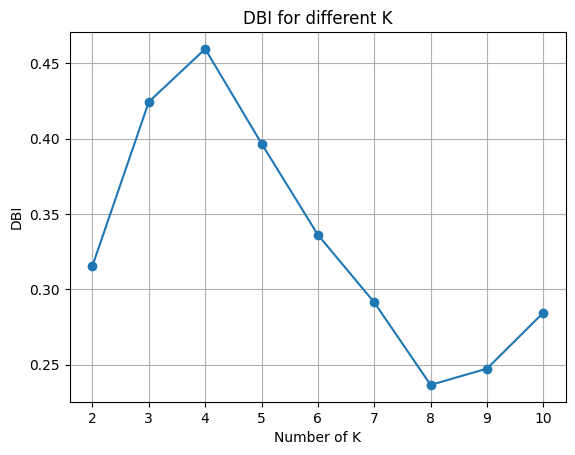

In [23]:
from sklearn.metrics import davies_bouldin_score

X = numerical_data[['Crm Cd', 'AREA']].values
X = X[:500]
# Generate random labels for demonstration (replace with your actual labels if available)
y = np.random.randint(0, 4, size=500)

k_val = []
dbi_val = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    dbi = davies_bouldin_score(X,labels)

    k_val.append(k)
    dbi_val.append(dbi)

import matplotlib.pyplot as plt
plt.plot(k_val, dbi_val, marker='o')
plt.title('DBI for different K')
plt.xlabel('Number of K')
plt.ylabel('DBI')
plt.grid(True)
plt.show()

Hierachal Clustering : Dendrograms and HeatMap

<ipython-input-24-7b56e8beef02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.dropna(inplace = True)


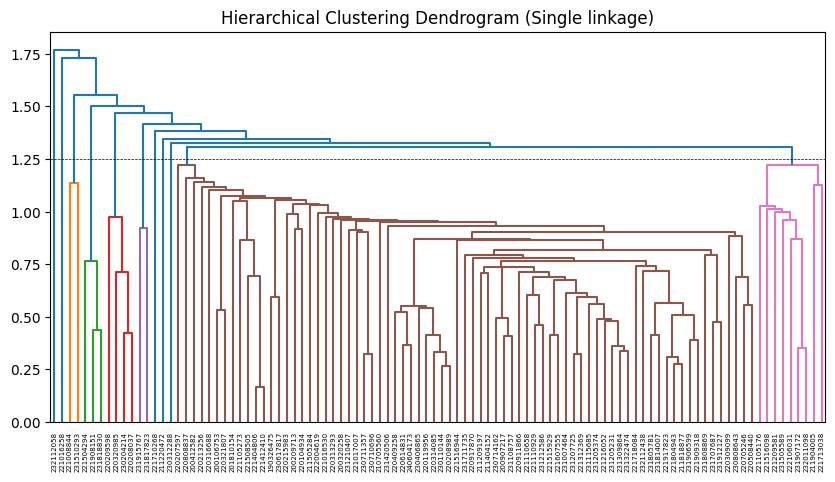

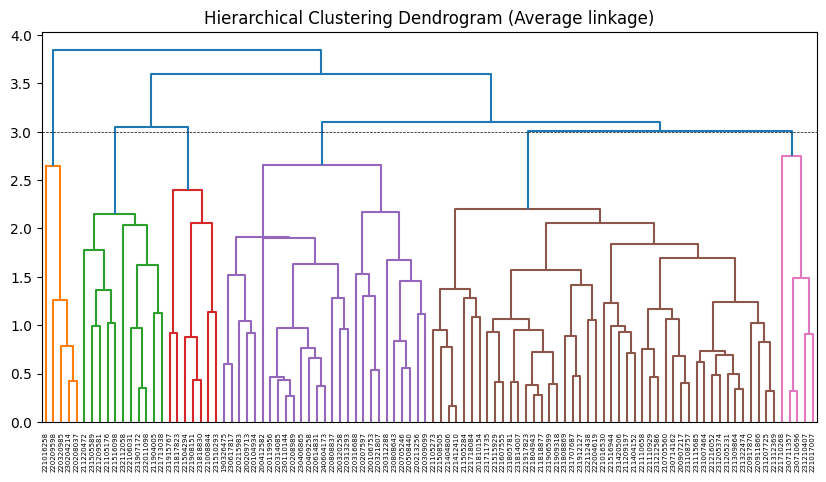

<function matplotlib.pyplot.show(close=None, block=None)>

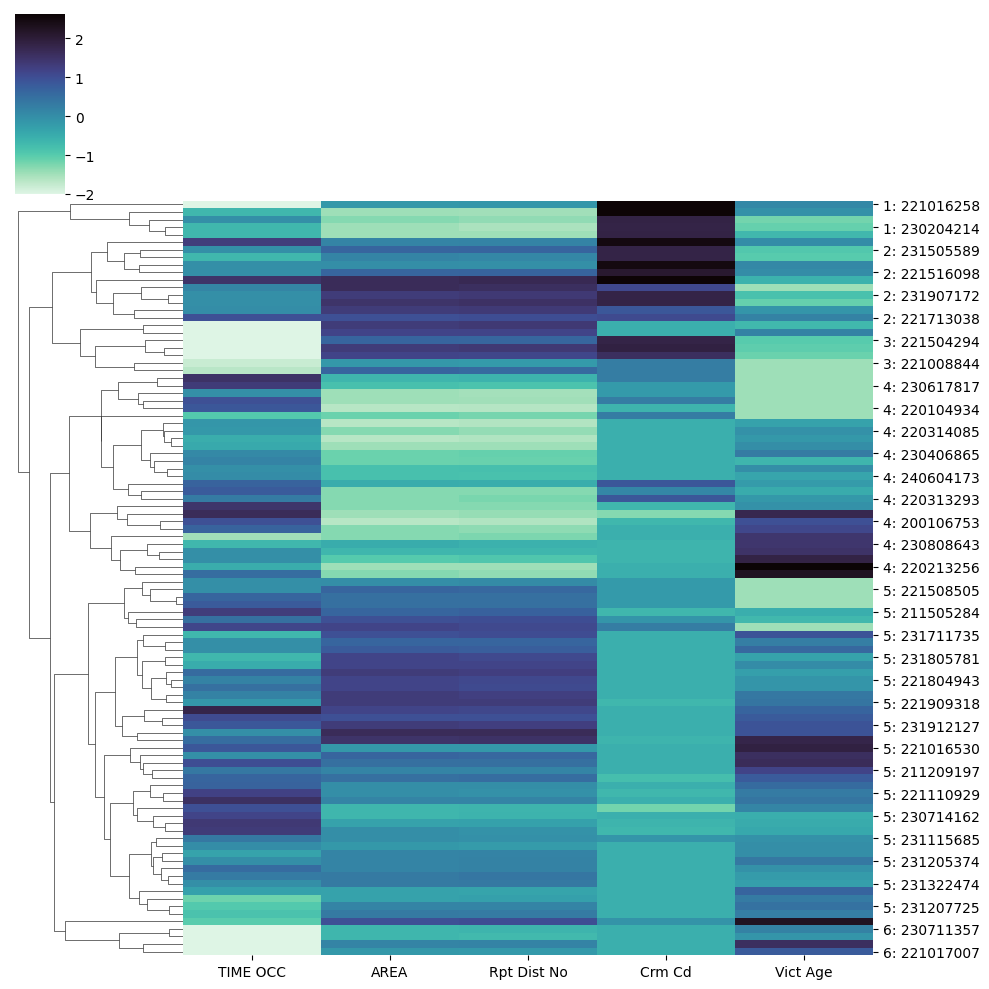

In [24]:
from pathlib import Path
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from pandas.plotting import parallel_coordinates

numerical_data.dropna(inplace = True)

crimes = numerical_data[['TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age']]
crimes = crimes[0:100]
crimes_norm = (crimes - crimes.mean())/crimes.std()

d_norm = pairwise.pairwise_distances(crimes_norm, metric = 'euclidean')
z = linkage(crimes_norm, method = 'single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
dendrogram(z, labels=crimes_norm.index, color_threshold=1.25)
plt.axhline(y=1.25, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

l = linkage(crimes_norm, method='average')
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
dendrogram(l, labels = crimes_norm.index, color_threshold=3)
plt.axhline(y=3, color = 'black', linewidth=0.5, linestyle='dashed')
plt.show()

mem = fcluster(linkage(crimes_norm, 'average'), 6, criterion='maxclust')
mem = pd.Series(mem, index=crimes_norm.index)


crimes_norm.index = ['{}: {}'.format(cluster, AREA) for cluster, AREA in zip(mem, crimes_norm.index)]
sns.clustermap(crimes_norm, method = 'average', col_cluster=False, cmap = "mako_r")
plt.show